In [ ]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#reading the Red Wine dataset as dataframe
df = pd.read_csv("/content/winequality-red.csv" , sep= ';')

## **Exploring the dataset**

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


It can be seen that there are no null values in the dataset.

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## **Visualising the dataset**

---





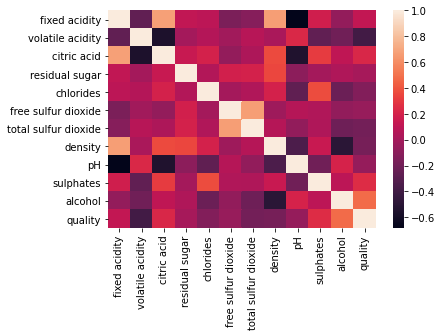

In [ ]:
sns.heatmap(df.corr())

From the above correlation heatmap, it can be seen that quality of the wine has a good positive correlation with the **alcohol**, **sulphates**, and **citric** **acid**.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


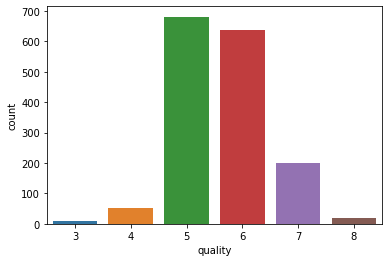

In [ ]:
sns.countplot(df['quality'])

It can be seen that the dataset is skewed, and the quality values "5" and "6" are arbitrarily higher in number compared to the others.
As my objective is to build a binary classification model which predicts if the quality of red wine is good or bad, I have assumed the quality values higher than 6 to be good (1) else the quality is bad (0).

In [ ]:
#creating a new column quality_2 for the binary classification of the quality parameter

df['quality_2'] = df['quality'].apply(lambda x: 1 if x > 6 else 0)

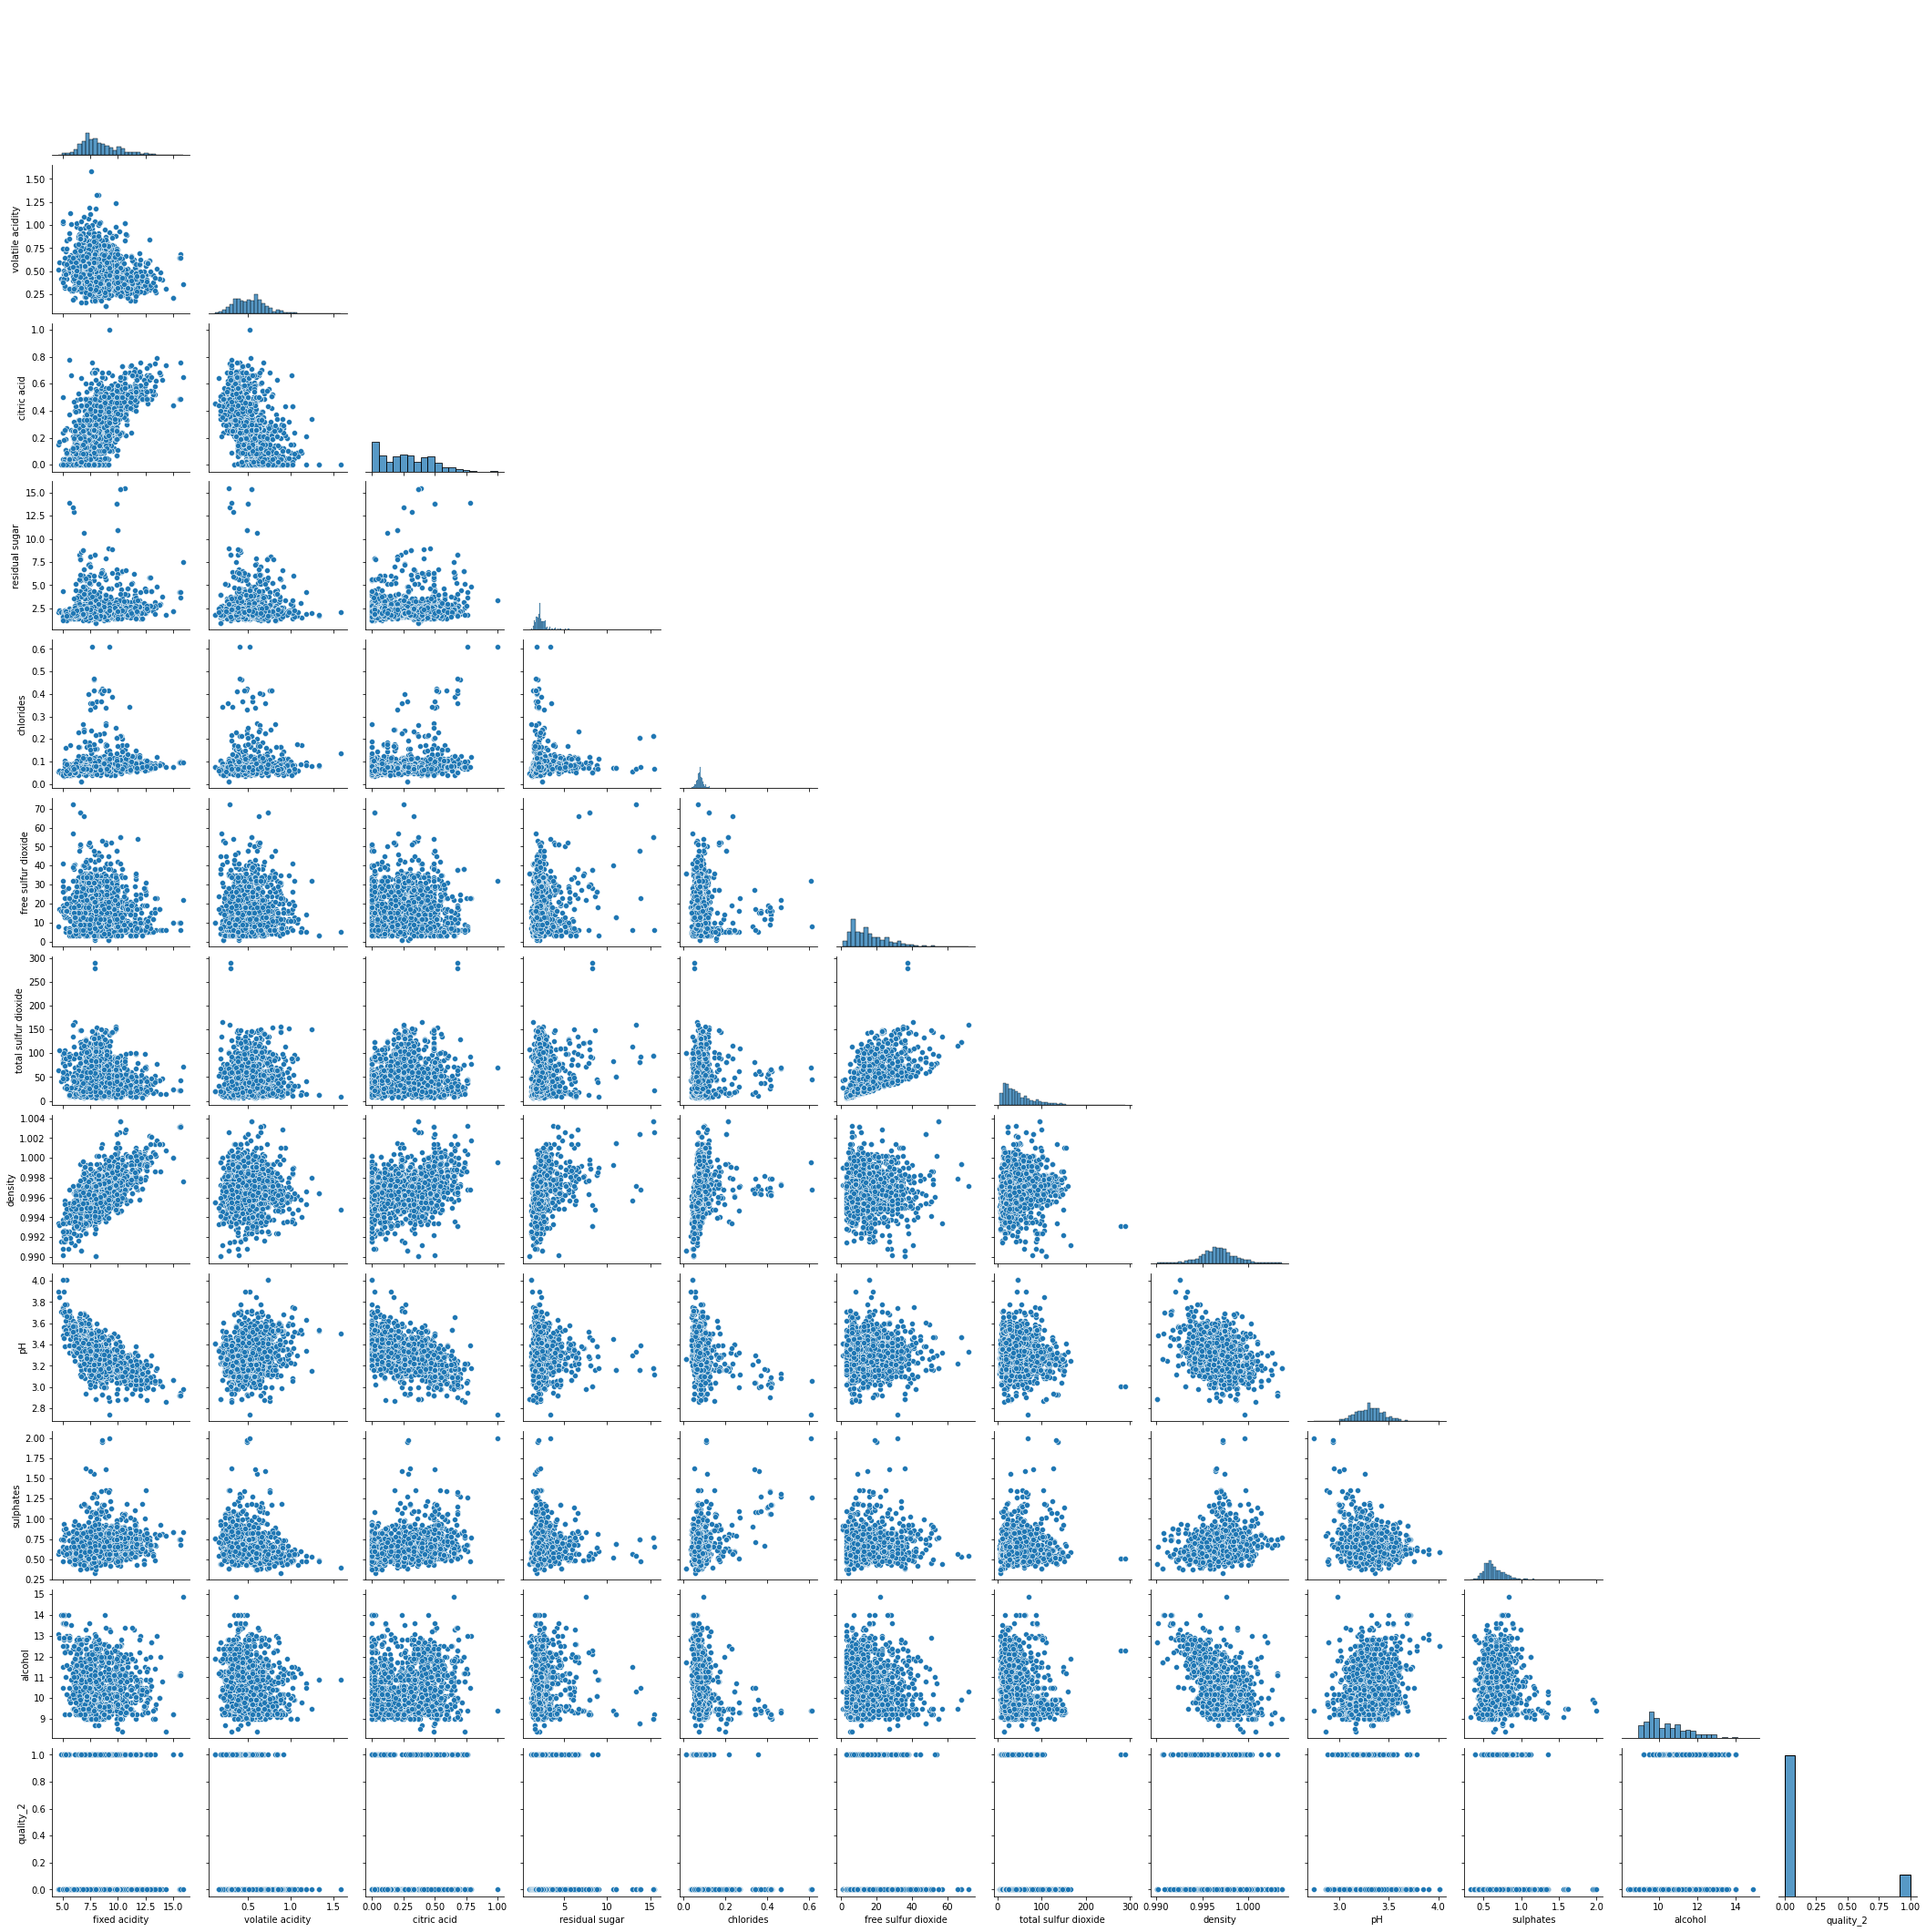

In [ ]:
sns.pairplot(data= df.drop('quality' , axis=1) , corner= True)

From the pairplot it can observed that good quality wines have higher levels of alcohol on average, have a lower volatile acidity on average, lower levels of sulphates on average, and lower levels of residual sugar, total sulfur dioxide, and chlorides on average.

#Machine Learning

---






In [ ]:
#separating the features from the labels into 2 objects, X and y

X = df.drop(['quality' , 'quality_2'], axis=1)
y = df['quality_2']

In [ ]:
#importing the train-test split module to split the data,
#with the test size of 10% and a random_state of 101

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
#importing and creating a StandardScaler object

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
#normalizing the X_train and X_test set feature data

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#importing the GridSearchCV and XGBoost machine learning packages

from sklearn.model_selection import GridSearchCV
import xgboost as xg

In [ ]:
#creating an instance of the XGBoost Classifier

model_xgb = xg.XGBClassifier()

In [ ]:
#creating a dictionary parameter grid of values for the various XGBoost Classifier

params = {'learning_rate' : [0.0011 , 0.001 , 0.0009 , 0.00099 , 0.000999] , 'n_estimators' : [100000] ,
          'max_depth' : [6 , 7 , 8 , 9]}

In [ ]:
#running a grid search for the best parameters for the model based on the scaled training data

clf = GridSearchCV(model_xgb, params , verbose=3)
clf.fit(X_train_scaled , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] learning_rate=0.0011, max_depth=6, n_estimators=100000 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.0011, max_depth=6, n_estimators=100000, score=0.903, total= 2.0min
[CV] learning_rate=0.0011, max_depth=6, n_estimators=100000 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min remaining:    0.0s


[CV]  learning_rate=0.0011, max_depth=6, n_estimators=100000, score=0.906, total= 2.0min
[CV] learning_rate=0.0011, max_depth=6, n_estimators=100000 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.0min remaining:    0.0s


[CV]  learning_rate=0.0011, max_depth=6, n_estimators=100000, score=0.910, total= 2.1min
[CV] learning_rate=0.0011, max_depth=6, n_estimators=100000 ..........
[CV]  learning_rate=0.0011, max_depth=6, n_estimators=100000, score=0.924, total= 2.0min
[CV] learning_rate=0.0011, max_depth=6, n_estimators=100000 ..........
[CV]  learning_rate=0.0011, max_depth=6, n_estimators=100000, score=0.923, total= 2.0min
[CV] learning_rate=0.0011, max_depth=7, n_estimators=100000 ..........
[CV]  learning_rate=0.0011, max_depth=7, n_estimators=100000, score=0.896, total= 2.1min
[CV] learning_rate=0.0011, max_depth=7, n_estimators=100000 ..........
[CV]  learning_rate=0.0011, max_depth=7, n_estimators=100000, score=0.906, total= 2.1min
[CV] learning_rate=0.0011, max_depth=7, n_estimators=100000 ..........
[CV]  learning_rate=0.0011, max_depth=7, n_estimators=100000, score=0.913, total= 2.1min
[CV] learning_rate=0.0011, max_depth=7, n_estimators=100000 ..........
[CV]  learning_rate=0.0011, max_depth=7,

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 213.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.0011, 0.001, 0.0009, 0.00099,
                                           0.000999],
                         'max_depth': [6, 7, 

In [ ]:
#displaying the best combination of parameters

clf.best_params_

{'learning_rate': 0.00099, 'max_depth': 8, 'n_estimators': 100000}

In [ ]:
#using the best parameters to train the model

model_xgb = xg.XGBClassifier(learning_rate= 0.00099, max_depth= 8, n_estimators= 100000) 

model_xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.00099, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#prediciting the model's outcome on the unseen test dataset

prediction = model_xgb.predict(X_test_scaled)

In [ ]:
#importing the necessary evaluation metrics

from sklearn.metrics import mean_absolute_error , mean_squared_error , classification_report , confusion_matrix

In [ ]:
#displaying the classification report

print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       142
           1       0.50      0.50      0.50        18

    accuracy                           0.89       160
   macro avg       0.72      0.72      0.72       160
weighted avg       0.89      0.89      0.89       160



The accuracy of this model is **0.89**, which I think is pretty descent, considering the size of the dataset.

In [ ]:
#displaying the confusion matrix

print(confusion_matrix(y_test , prediction))

[[133   9]
 [  9   9]]
